#pre-modeling

##Dependencies

In [ ]:
from google.colab import drive
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [ ]:
import pandas as pd

In [ ]:
DF=pd.read_csv("data.csv")

In [ ]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


In [ ]:
DF.isna().sum().sum()

0

In [ ]:
print("Undecanoic")
print(DF["LBXPFUA"].nunique())
DF["LBXPFUA"].value_counts()
#sr_dex=sr.index
#print(sr[sr_dex[0]:sr_dex[57]])
#print(sr[sr_dex[58]:sr_dex[-1]])

Undecanoic
26


0.07     1194
0.10      285
0.20      282
0.30      122
0.40       59
0.50       48
0.60       36
0.70       27
1.00       14
0.90       13
0.80       13
1.10        9
1.40        3
1.50        3
2.40        3
1.30        2
1.80        2
43.90       1
2.50        1
4.40        1
5.80        1
77.40       1
3.00        1
1.20        1
2.60        1
1.70        1
Name: LBXPFUA, dtype: int64

##making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

In [ ]:
d_p = {}
for col in DF.columns:
  if col.endswith('LC'):
    p = round(((DF[col][DF[col]==0].count())/len(DF))*100,2)
    d_p[col] = p


In [ ]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22,
 'URXTLC': 0.0}

In [ ]:
d_p.pop("URXTLC")

0.0

In [ ]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22}

In [ ]:
len(d_p)

25

In [ ]:
type(d_p)
import numpy as np
L2=np.array(list(d_p.items()))

##Decide which we can treat as binary


In [ ]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p.items() if (val <= 30 or val >= 70)}

In [ ]:
binary_variables

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMIBLC': 97.18,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTRSLC': 76.22}

In [ ]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
bin = list(binary_variables.keys())
print(bin)
for i in bin:
    binary_cols = DF[i]
    binary_dataset[i] = binary_cols
print(binary_dataset)


['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']
{'URDBP3LC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDBP3LC, Length: 2124, dtype: float64, 'URDBPHLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    1.0
2122    0.0
2123    0.0
Name: URDBPHLC, Length: 2124, dtype: float64, 'URDTRSLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    1.0
2121    1.0
2122    1.0
2123    0.0
Name: URDTRSLC, Length: 2124, dtype: float64, 'URDMPBLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDMPBLC, Length: 2124, dtype: float64, 'URDPPBLC'

In [ ]:
binary_list = []
for key in binary_dataset:
  binary_list.append(key)


In [ ]:
len(binary_list)

19

In [ ]:
print(binary_list)

['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']


In [ ]:
binary_df = DF.copy()
for i in binary_df.columns:
  if i not in binary_list:
    binary_df = binary_df.drop(columns=i)
binary_df.head()

,URDBP3LC,URDBPHLC,URDTRSLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URDCNPLC,URDCOPLC,URDECPLC,URDMBPLC,URDMC1LC,URDMEPLC,URDMHHLC,URDMCHLC,URDMIBLC,URDMOHLC,URDMZPLC,URDBPSLC
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

In [ ]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [ ]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

##which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [ ]:
intersection_set = set.intersection(set(DF.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [ ]:
print(len(intersection_list))

19


In [ ]:
intersection_list

['URDCNPLC',
 'URD14DLC',
 'URDMEPLC',
 'URDECPLC',
 'URDMPBLC',
 'URDMBPLC',
 'URDBPSLC',
 'URDMIBLC',
 'URDTRSLC',
 'URDMC1LC',
 'URDMCHLC',
 'URDBP3LC',
 'URDBPHLC',
 'URDMHHLC',
 'URDPPBLC',
 'URDMZPLC',
 'URDDCBLC',
 'URDMOHLC',
 'URDCOPLC']

In [ ]:
#percentage of what is binary in df
len(intersection_list)/len(DF)*100

0.8945386064030132

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop=[]
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

19

In [ ]:
print(cols_to_drop)

['URXCNP', 'URX14D', 'URXMEP', 'URXECP', 'URXMPB', 'URXMBP', 'URXBPS', 'URXMIB', 'URXTRS', 'URXMC1', 'URXMCH', 'URXBP3', 'URXBPH', 'URXMHH', 'URXPPB', 'URXMZP', 'URXDCB', 'URXMOH', 'URXCOP']


In [ ]:
type(cols_to_drop)

list

In [ ]:
#particular naming convention
cols_to_drop = ['URXMHNC' if item == 'URXMCH' else item for item in cols_to_drop]

In [ ]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
DF=DF.drop(columns=cols_to_drop)

In [ ]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,1.0,0.64,1.0,0.0,0.0,0.14,1.0,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.60,0.0,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,7.50,0.0,0.0,138.70,0.0,0.0,0.0,1.60,0.0,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,5.70,0.0,0.0,3.50,0.0,0.0,0.0,0.14,1.0,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,2.30,0.0,0.0,0.64,1.0,0.0,0.0,0.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.50,0.0,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.30,0.0,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.14,1.0,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,4.80,0.0,0.0,3.20,0.0,0.0,0.0,0.14,1.0,1.0


##taking log of continuous values

In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = DF.columns[DF.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in DF.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    DF[col] = np.log(DF[col])

In [ ]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.0,-1.609438,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,1.0
1,0.0,-1.203973,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
2,0.0,-2.302585,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,2.014903,0.0,0.0,4.932313,0.0,0.0,0.0,0.470004,0.0,0.0
3,0.0,-1.609438,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,0.0,...,1.740466,0.0,0.0,1.252763,0.0,0.0,0.0,-1.966113,1.0,0.0
4,0.0,-2.302585,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.916291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,-2.659260,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
2120,0.0,-1.609438,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0
2121,0.0,-0.105361,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
2122,0.0,-1.609438,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,1.568616,0.0,0.0,1.163151,0.0,0.0,0.0,-1.966113,1.0,1.0


##Splitting the data
We are trying to predict detection level of 2-(N-methyl-PFOSA) acetate (ug/L)

In [ ]:
from sklearn.model_selection import train_test_split
leftover, test = train_test_split(DF, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
train, dev =train_test_split(leftover, test_size=0.2)
X_train=train.drop(columns=['LBDPFUAL','LBXPFUA'])
X_dev=dev.drop(columns=['LBDPFUAL','LBXPFUA'])
X_test=test.drop(columns=['LBDPFUAL','LBXPFUA'])
Y_train=train['LBXPFUA']
Y_test=test['LBXPFUA']
Y_dev=dev['LBXPFUA']

In [ ]:
Y_test

1032   -0.916291
1650   -2.659260
1223   -2.659260
1605   -2.659260
354    -2.659260
          ...   
1517   -2.659260
935    -1.203973
621    -2.659260
1456   -2.659260
2031   -2.659260
Name: LBXPFUA, Length: 425, dtype: float64

In [ ]:
X_train

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
1323,0.0,-1.203973,1.029619,0.0,-1.203973,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.105361,0.0,0.0,-0.446287,1.0,0.0,0.0,1.974081,0.0,0.0
446,0.0,-1.609438,-0.356675,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,1.223775,0.0,0.0,0.182322,0.0,0.0,0.0,-1.203973,0.0,0.0
559,0.0,-2.302585,0.875469,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
976,1.0,-2.659260,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,1.131402,0.0,0.0,1.526056,0.0,0.0,0.0,1.308333,0.0,0.0
839,0.0,-1.203973,0.641854,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0.0,-1.609438,-0.916291,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,0.955511,0.0,0.0,0.0,1.335001,0.0,0.0
1356,0.0,-1.609438,-0.356675,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.105361,0.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
1654,1.0,-2.659260,-1.203973,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,1.0,-1.966113,1.0,1.0
1043,1.0,-2.659260,-0.510826,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,2.624669,0.0,0.0,3.616309,0.0,0.0,0.0,2.128232,0.0,0.0


In [ ]:
X_dev

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
1373,0.0,-1.203973,0.405465,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,0.993252,0.0,0.0,-0.446287,1.0,0.0,0.0,0.000000,0.0,1.0
1787,0.0,-1.609438,0.741937,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,0.993252,0.0,0.0,3.054001,0.0,0.0,0.0,0.470004,0.0,0.0
1024,1.0,-2.659260,1.163151,0.0,-0.916291,0.0,-2.65926,1.0,-2.659260,1.0,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
1678,1.0,-2.659260,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,1.098612,0.0,0.0,0.000000,0.0,0.0,0.0,2.687847,0.0,0.0
1146,0.0,-1.203973,-0.916291,0.0,-1.609438,0.0,-2.65926,1.0,-2.302585,0.0,...,-0.562119,1.0,1.0,0.262364,0.0,0.0,0.0,-1.966113,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,0.0,-0.916291,0.993252,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,1.504077,0.0,0.0,2.484907,0.0,0.0,0.0,-0.356675,0.0,0.0
968,0.0,-1.609438,-0.105361,0.0,-2.659260,1.0,-2.65926,1.0,-1.203973,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.223144,0.0,0.0
783,0.0,-0.916291,1.960095,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,1.667707,0.0,0.0
1039,0.0,-1.203973,1.098612,0.0,-2.659260,1.0,-2.65926,1.0,-2.302585,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0


In [ ]:
include=list(X_train.columns)

##Scaled training, development, testing

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
X_dev_scaled = sc.fit_transform(X_dev)

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.0
R squared dev set -0.004134050141135548
MSE training set 0.5945524164534113
MSE dev set 0.77579810150298
RMSE training set 0.7710722511239859
RMSE dev set 0.8807940176357807


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


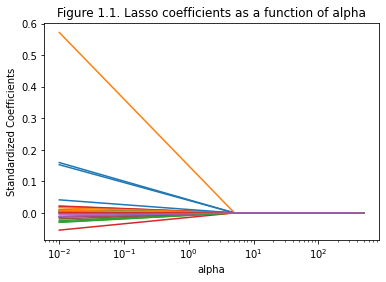

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Figure 1.1. Lasso coefficients as a function of alpha');
plt.savefig("Figure 1.1 lasso coef.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_lasso = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_lasso.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
model_lasso.alpha_


0.008416931053825214

In [ ]:
# Set best alpha
lasso_best = Lasso(alpha=model_lasso.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.008416931053825214)

In [ ]:
Lasso(alpha=model_lasso.alpha_)

Lasso(alpha=0.008416931053825214)

In [ ]:
print(list(zip(lasso_best.coef_, X_train_scaled)))

[(0.1634619560606446, array([-0.5265507 ,  0.58627688,  0.83134661, -0.09438584,  1.20859688,
       -1.12472219, -0.0664822 ,  0.07195495, -0.29566603,  0.3755768 ,
        0.70475554, -0.09438584, -0.39400954,  0.45253424, -0.20923384,
       -0.21114235, -0.57665573,  0.8397287 , -0.55269838, -0.52341085,
        0.69077776, -0.72687542,  0.98756807, -0.08164966, -0.09827638,
       -0.12221506, -0.22412461, -0.12221506, -0.03839062, -0.05433258,
       -0.12221506, -0.34826302, -0.02713627, -0.09033403,  0.56856984,
       -0.46610669, -0.78236797, -0.18292096, -0.6380546 ,  0.83084205,
       -0.08609819, -0.17414363,  1.83517999, -0.72120332, -0.33210558])), (0.5737297341336778, array([-0.5265507 ,  0.09419723, -0.68951839, -0.09438584, -0.67497969,
        0.88910845, -0.0664822 ,  0.07195495, -0.29566603,  0.3755768 ,
        0.41774802, -0.09438584, -0.39400954,  0.45253424, -0.20923384,
       -0.21114235, -0.37397981, -1.19086081,  1.80930509,  0.89105704,
       -1.4476436 

In [ ]:
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [ ]:
y_pred

array([-2.26024070e+00, -2.71323834e+00, -1.93690700e+00, -2.98188019e+00,
       -2.30911363e+00, -1.23537140e+00, -1.82889002e+00, -1.91890785e+00,
       -2.97638154e+00, -2.60131231e+00, -2.93332962e+00, -2.23531912e+00,
       -2.86342093e+00, -2.10588020e+00, -2.69839703e+00, -2.61863276e+00,
       -2.92505846e+00, -2.41320824e+00, -1.38069627e+00, -3.02406119e+00,
       -2.40790723e+00, -2.24969979e+00, -2.93415962e+00, -1.98688340e+00,
       -2.59848397e+00, -2.88017977e+00, -2.90738156e+00, -1.74213567e+00,
       -1.66207154e+00, -1.09751741e+00, -1.98218312e+00, -2.65269020e+00,
       -2.34776353e+00, -2.02886258e+00, -2.55097874e+00, -2.75901610e+00,
       -1.50573564e+00, -2.35136564e+00, -2.78227876e+00, -1.70182017e+00,
       -2.08957003e+00, -2.29737409e+00,  1.10467831e-01, -2.30646913e+00,
       -2.06100599e+00, -2.87361444e+00, -2.70226267e+00, -2.50378312e+00,
       -2.33471268e+00, -2.33671191e+00, -2.76593822e+00, -2.71188128e+00,
       -2.94223078e+00, -

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set -1.1341239364143525
R squared test set 0.6420686215934935
MSE training set 1.2688485434062193
MSE test set 0.22201258292075368
RMSE training set 1.1264317748564354
RMSE test set 0.47118211226738405


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


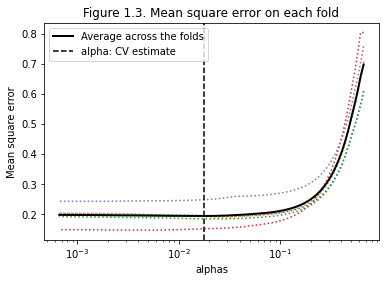

In [ ]:
plt.semilogx(model_lasso.alphas_, model_lasso.mse_path_, ":")
plt.plot(
    model_lasso.alphas_ ,
    model_lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Figure 1.3. Mean square error on each fold")
plt.axis("tight")
plt.savefig("Figure 1.3 mse lasso.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

#ymin, ymax = 0.125, 0.35
#plt.ylim(ymin, ymax);

In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1694,-2.659260,-1.995595
1734,-2.659260,-2.465344
119,-2.659260,-2.774559
828,-2.659260,-2.794104
715,-2.659260,-2.302690
...,...,...
1196,0.336472,-0.576714
629,0.405465,-0.057569
277,0.587787,-0.121243
1599,0.875469,0.110468


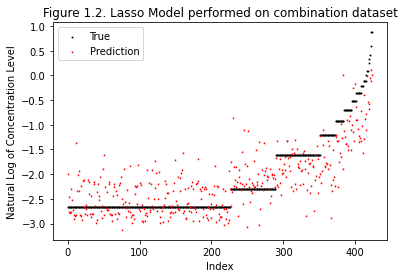

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="black", label="True",s=0.9)
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="red", label="Prediction",marker="v",s=0.8)
plt.xlabel('Index')
plt.ylabel("Natural Log of Concentration Level")
plt.title("Figure 1.2. Lasso Model performed on combination dataset")
plt.legend()
plt.savefig("Figure 1.2 lasso combo.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

#Decision Tree Regression

[Python | Decision Tree Regression using sklearn](https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_dev)

to be able to plot the results we need to make sure the results are on the same index so they match up

In [ ]:
list(X_dev.index)==list(Y_dev.index)

True

In [ ]:
y_pred_series=pd.Series(y_pred,index=X_dev.index)
list(y_pred_series.index)==list(Y_dev.index)

True

In [ ]:
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=test_Df.sort_values(by=['Actual'])
dev_Df

,Actual,Prediction
1694,-2.659260,-1.995595
1425,-2.659260,-2.652690
1754,-2.659260,-2.782279
1663,-2.659260,-2.351366
798,-2.659260,-2.183956
...,...,...
1196,0.336472,-0.576714
629,0.405465,-0.057569
277,0.587787,-0.121243
1599,0.875469,0.110468


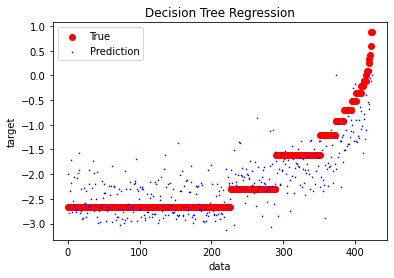

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 1.0
R squared dev set 0.4443435425290335
MSE training set 7.346593695146012e-34
MSE dev set 0.429302466870093
RMSE training set 2.7104600523058833e-17
RMSE dev set 0.6552117725362487


[Train a regression model using a decision tree
](https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1)

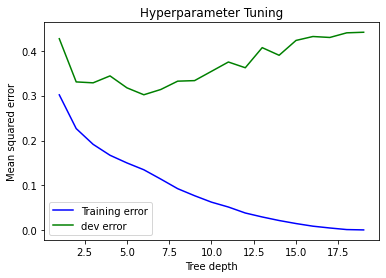

In [ ]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, Y_train)
    training_error.append(mse(Y_train, model_1.predict(X_train)))
    
dev_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, Y_train)
    y_pred = reg.predict(X_dev)
    dev_error.append(mse(Y_dev, model_2.predict(X_dev)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, dev_error, color='green', label='dev error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning')
plt.legend()

lowest for testing at around 4 and training as it goes on, but this is overfitting

In [ ]:
reg = DecisionTreeRegressor(random_state = 0,max_depth=5) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

In [ ]:
y_pred_series=pd.Series(y_pred,index=X_test.index)
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

,Actual,Prediction
1694,-2.659260,-2.241953
1734,-2.659260,-2.451306
119,-2.659260,-2.632987
828,-2.659260,-2.632987
715,-2.659260,-2.241953
...,...,...
1196,0.336472,-0.686325
629,0.405465,-0.004777
277,0.587787,-0.004777
1599,0.875469,-0.004777


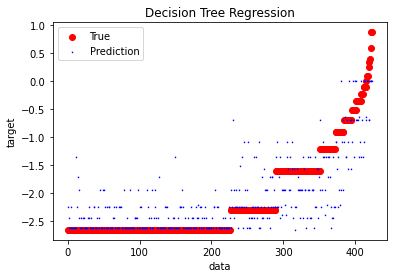

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.747525764605721
R squared test set 0.6617702629751566
MSE training set 0.15010916674589597
MSE test set 0.20979232911010895
RMSE training set 0.38743924265089097
RMSE test set 0.4580309259319822


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
reg = RandomForestRegressor(random_state = 0)
 
#fit the regressor with x and y data
reg.fit(X_train, Y_train) 
y_pred = reg.predict(X_dev)

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.9502192176475159
R squared dev set 0.6399985160231338
MSE training set 0.029597284440610737
MSE dev set 0.27813862876998646
RMSE training set 0.17203861322566727
RMSE dev set 0.5273884988980955


In [ ]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1134,-2.659260,-2.659260
551,-2.659260,-2.336574
344,-2.659260,-2.606769
736,-2.659260,-2.379172
1927,-2.659260,-2.588329
...,...,...
609,0.336472,-0.432699
2082,0.587787,0.339905
230,1.098612,0.277694
1243,1.757858,0.221428


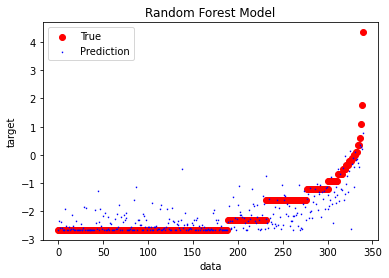

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_dev)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

repeat process with most important features [Random Forest in Python
](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [ ]:
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: LBXPFDE              Importance: 0.67
Variable: LBXPFHS              Importance: 0.05
Variable: LBXPFNA              Importance: 0.05
Variable: URXEPB               Importance: 0.03
Variable: URXBPF               Importance: 0.03
Variable: URXTLC               Importance: 0.02
Variable: URXBUP               Importance: 0.02
Variable: URXMHP               Importance: 0.02
Variable: URXMNP               Importance: 0.02
Variable: LBXMPAH              Importance: 0.01
Variable: LBXPFHP              Importance: 0.01
Variable: LBXPFDO              Importance: 0.01
Variable: LBDPFDOL             Importance: 0.01
Variable: LBDPFDEL             Importance: 0.0
Variable: LBDPFHSL             Importance: 0.0
Variable: LBDMPAHL             Importance: 0.0
Variable: LBXPFBS              Importance: 0.0
Variable: LBDPFBSL             Importance: 0.0
Variable: LBDPFHPL             Importance: 0.0
Variable: LBDPFNAL             Importance: 0.0
Variable: URDBP3LC             Importance: 0.0


note: LBXPFDE with an. Importance of 0.67 is perflurodecanoic acid which is a fluoroalkanoic acid. this is a haloacetic acid that is acetic acid in which one of the methyl hydrogens is substituted by fluorine. * haloacetic acidsare more carcinogenic than trihalomethanes. tied to bladder cancer and thyronamines aka thyroid issues due to hormonal imbalances
@anna

#ANNA READ ABOVE MESSAGE

In [ ]:
#make a list with everying above 0 importance in order of highest to lowest
include=[]
for i,j in feature_importances:
  if j >0:
    include.append(i)
print(include)

['LBXPFHS', 'LBXPFNA', 'URXMHP', 'URXBPF', 'URXEPB', 'URXTLC', 'URXBUP', 'URXMNP', 'LBXPFDE', 'LBXPFUA', 'LBXPFHP', 'LBXPFDO', 'LBDPFHPL', 'LBDPFUAL', 'LBDPFDOL', 'URDBP3LC', 'URDBPHLC', 'URDTLCLC', 'URDTRSLC', 'URDBUPLC', 'URDEPBLC', 'URDDCBLC', 'URDMC1LC', 'URDMCHLC', 'URDMHPLC', 'URDMIBLC', 'URDMNPLC', 'URDBPFLC', 'URDBPSLC']


In [ ]:
reg_important = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg_important.fit(X_train[include], Y_train) 
y_pred = reg_important.predict(X_dev[include])

In [ ]:
pred_train = reg_important.predict(X_train[include])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg_important.predict(X_dev[include])
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.8554484565722297
R squared dev set 0.021737003584351045
MSE training set 0.09282920525146021
MSE dev set 0.5128461521053217
RMSE training set 0.304678855931061
RMSE dev set 0.716132775472064


In [ ]:
pred_dict={}
R_train_dict={}
R_dev_dict={}
mse_train_dict={}
mse_dev_dict={}
rmse_train_dict={}
rmse_dev_dict={}
#making a loop to go through adding one at a time and evaulating
for i in range(1,len(include)+1):
  #used is a list of what will be included
  used=include[:i]
  #fit the regression
  rf = RandomForestRegressor(random_state = 0)
  rf.fit(X_dev[used], Y_dev)
  y_pred = rf.predict(X_dev[used])
  pred_dict[i]=y_pred
  pred_train = rf.predict(X_train[used])
  #R squared test
  R_train=metrics.r2_score(Y_train,pred_train)
  R_train_dict[i]=R_train
  R_dev=metrics.r2_score(Y_dev,y_pred)
  R_dev_dict[i]=R_dev
  #MSE
  mse_train = mean_squared_error(Y_train, pred_train)
  mse_train_dict[i]=mse_train
  mse_dev = mean_squared_error(Y_dev, y_pred)
  mse_dev_dict[i]=mse_dev
  #RMSE
  rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
  rmse_train_dict[i]=rmse_train
  rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
  rmse_dev_dict[i]=rmse_dev

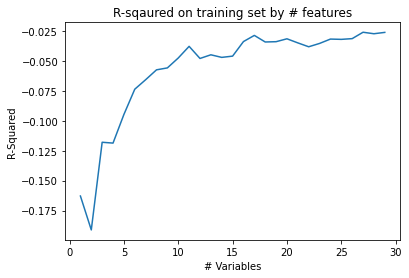

In [ ]:
# Make a graph by #vars
plt.plot([int(key) for key in R_train_dict.keys()], 
         [float(value) for value in R_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on training set by # features');

levels off around 3 features

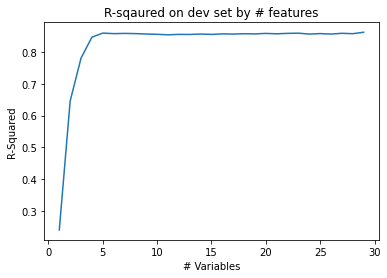

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in R_dev_dict.keys()], 
         [float(value) for value in R_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on dev set by # features');

levels off around 3-4 features

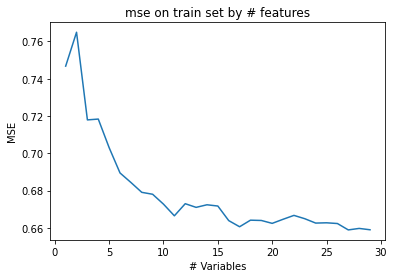

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_train_dict.keys()], 
         [float(value) for value in mse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on train set by # features');

levels off around 3 features

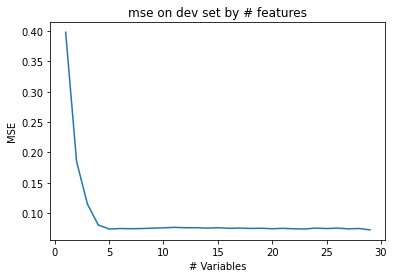

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_dev_dict.keys()], 
         [float(value) for value in mse_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on dev set by # features');

lowest around 3-4 features

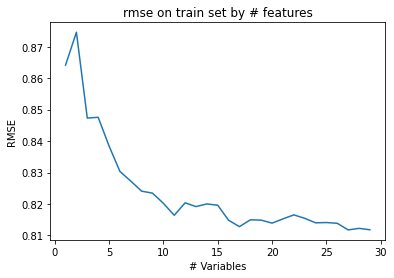

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_train_dict.keys()], 
         [float(value) for value in rmse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on train set by # features');

levels off around 3 features

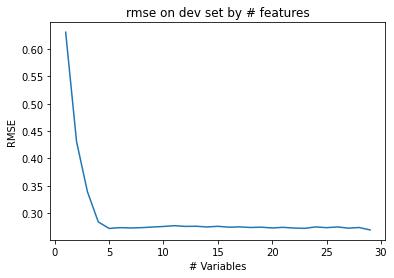

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_dev_dict.keys()], 
         [float(value) for value in rmse_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on dev set by # features');

levels off around 3 features

**verdict: use 3 features**

In [ ]:
include[0:3]

['LBXPFHS', 'LBXPFNA', 'URXMHP']

In [ ]:
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred = reg2.predict(X_test[include[0:3]])

In [ ]:
#for later use
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred_forest = reg2.predict(X_test[include[0:3]])
y_pred_series_forest=pd.Series(y_pred_forest,index=X_test.index)

In [ ]:
pred_train = reg2.predict(X_train[include[0:3]])
#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg2.predict(X_test[include[0:3]])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.7279021347887938
R squared test set -0.22350341373866867
MSE training set 0.17473786843927042
MSE test set 0.6934778675206638
RMSE training set 0.41801658871302033
RMSE test set 0.832753185235976


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1413,-2.659260,-2.648627
530,-2.659260,-2.171876
1010,-2.659260,-2.044863
1261,-2.659260,-1.752951
1646,-2.659260,-2.614441
...,...,...
1236,0.182322,-1.818090
1672,0.262364,-2.304389
753,0.262364,-2.391605
641,0.470004,-2.348835


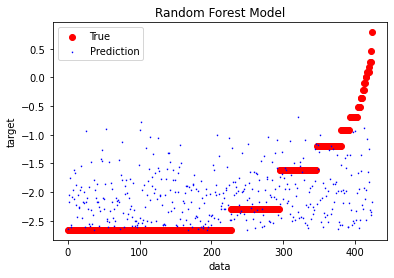

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

# Ordinary Least Squares Regression

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[OLS Linear Regression Basics with Python’s Scikit-learn](https://python.plainenglish.io/ols-linear-regression-basics-with-pythons-scikit-learn-4ecfe88145b)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_dev)

In [ ]:
reg.coef_

array([-0.00492491,  0.05139918,  0.10103778,  0.19336592,  0.43924545,
        0.57301145,  0.16058153,  0.03561341,  0.1461319 ,  0.02618624,
       -0.12709513, -0.08577422, -0.05346744,  0.0822001 ,  0.10219381,
        0.13914015, -0.00577776, -0.15598241,  0.05564047,  0.03611106,
        0.04270493,  0.00338273,  0.00991806,  0.20240597, -0.19922079,
       -0.10038974,  0.11613554,  0.0957505 , -0.56366152,  0.00822679,
        0.09383703, -0.00331154, -0.26898011, -0.14621326,  0.02598223,
        0.0278764 ,  0.01437387,  0.38842036, -0.02143893,  0.02631769,
        0.08323416, -0.31275438, -0.00142685, -0.11704257,  0.04998884])

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.09291358690831719
R squared dev set 0.08810407425018152
MSE training set 0.5825196246609007
MSE dev set 0.47805377322338377
RMSE training set 0.7632297325582257
RMSE dev set 0.6914143281877978


In [ ]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
227,-2.659260,-2.264626
1698,-2.659260,-2.293357
1608,-2.659260,-2.144860
639,-2.659260,-2.217017
108,-2.659260,-2.125476
...,...,...
1151,-0.223144,-2.063958
938,0.095310,-2.152108
2107,0.336472,-2.160277
1901,0.405465,-2.063499


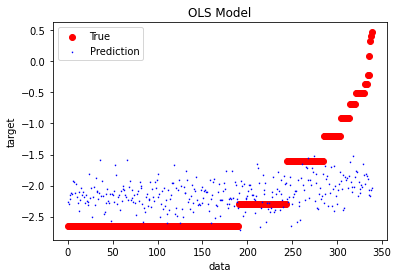

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

In [ ]:
bic_dict={}
for i in X_train.columns:
  reg1 = sm.OLS(Y_train, sm.add_constant(X_train[i])).fit()
  bic_dict[i]=reg1.bic
sorted(bic_dict.items(), key=lambda x: x[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[('LBXPFHS', 3220.8028378182207),
 ('LBXPFNA', 3223.8006508859576),
 ('LBXPFDE', 3251.3946064882443),
 ('LBDPFDEL', 3251.8676890693446),
 ('URDTLCLC', 3255.9519789948336),
 ('LBXPFHP', 3257.519443407441),
 ('LBDPFUAL', 3257.929586485152),
 ('URDMIBLC', 3260.7953653543245),
 ('LBDPFHPL', 3260.854527564155),
 ('LBDPFDOL', 3261.787746632104),
 ('LBXPFDO', 3262.5200614216296),
 ('URXTLC', 3263.5380887695),
 ('URDBPHLC', 3265.7134261662995),
 ('URDBPFLC', 3265.969009498308),
 ('LBDPFNAL', 3266.2414069236625),
 ('LBXPFUA', 3266.2758252280873),
 ('URXBUP', 3266.5953948778156),
 ('URDMNPLC', 3266.6892286242864),
 ('URXBPF', 3267.0633508037463),
 ('URDDCBLC', 3267.10168535607),
 ('LBDPFHSL', 3267.109610144059),
 ('URXMNP', 3267.1954384588726),
 ('URDMCHLC', 3267.460484399064),
 ('URDMBPLC', 3267.528119679793),
 ('URDPPBLC', 3267.56373773373),
 ('URDBP3LC', 3267.6719939359054),
 ('URDMEPLC', 3267.9569439024212),
 ('URDMZPLC', 3267.963386661618),
 ('URDTRSLC', 3268.0462041922647),
 ('URDCOPLC', 3

In [ ]:
used_OLS=list(np.asarray(sorted(bic_dict.items(), key=lambda x: x[1])[0:5])[:,0])
used_OLS

['LBXPFHS', 'LBXPFNA', 'LBXPFDE', 'LBDPFDEL', 'URDTLCLC']

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred=reg.predict(X_dev[used_OLS])

In [ ]:
pred_train = reg.predict(X_train[used_OLS])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train[used_OLS])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev[used_OLS])
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.05415831103209179
R squared dev set 0.03190678215336984
MSE training set 0.6074077813251617
MSE dev set 0.5075147311827333
RMSE training set 0.7793637028532711
RMSE dev set 0.7124006816270836


In [ ]:
print(list(X_dev[used_OLS].index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev[used_OLS].index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
227,-2.659260,-2.110714
1698,-2.659260,-2.397403
1608,-2.659260,-2.262852
639,-2.659260,-2.147072
108,-2.659260,-2.183276
...,...,...
1151,-0.223144,-2.038792
938,0.095310,-2.103725
2107,0.336472,-2.100961
1901,0.405465,-2.019277


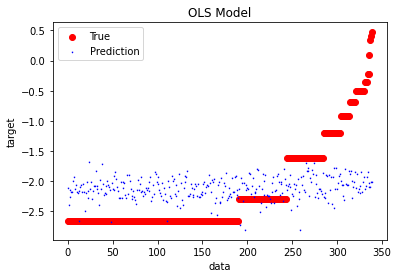

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred=reg.predict(X_test[used_OLS])

In [ ]:
pred_train = reg.predict(X_train[used_OLS])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared testing set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train[used_OLS])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test[used_OLS])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.05415831103209179
R squared testing set 0.0244726241745028
MSE training set 0.6074077813251617
MSE test set 0.5529258330618698
RMSE training set 0.7793637028532711
RMSE test set 0.7435898285088829


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1413,-2.659260,-2.317873
530,-2.659260,-2.329100
1010,-2.659260,-2.040082
1261,-2.659260,-2.103899
1646,-2.659260,-2.022458
...,...,...
1236,0.182322,-2.067145
1672,0.262364,-1.976124
753,0.262364,-2.074393
641,0.470004,-2.106402


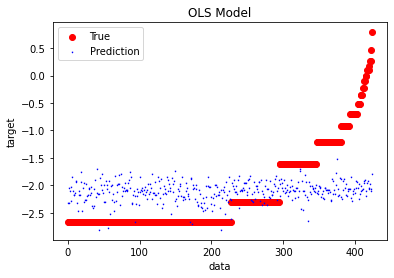

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

#Neural Network

[sklearn.neural_network.MLPRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

##initial

In [ ]:
from collections import defaultdict

In [ ]:
labels=Y_train
data=X_train_scaled
dev_labels=Y_dev
dev_data=X_dev_scaled

In [ ]:
labels

1687   -1.609438
723    -2.659260
973    -1.609438
845    -0.510826
1630    0.095310
          ...   
437    -2.659260
348    -2.659260
1200   -2.659260
1883   -2.659260
877    -2.659260
Name: LBXPFUA, Length: 1359, dtype: float64

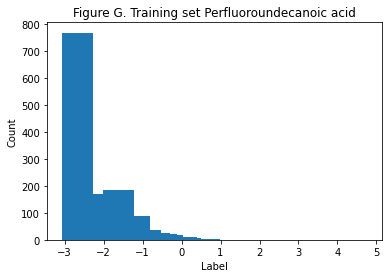

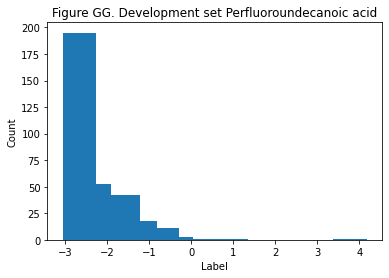

In [ ]:
counts = defaultdict(int)
for label in labels:
 counts[label] += 1

plt.figure()
plt.title("Figure G. Training set Perfluoroundecanoic acid")
k = counts.keys()
v = counts.values()
plt.xlabel('Label')
plt.ylabel("Count")
plt.bar(list(k), height=list(v))
plt.savefig("Figure G.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

dev_counts = defaultdict(int)
for label in dev_labels:
 dev_counts[label] += 1
plt.figure()
plt.title("Figure GG. Development set Perfluoroundecanoic acid")
dk = dev_counts.keys()
dv = dev_counts.values()
plt.xlabel('Label')
plt.ylabel("Count")
plt.bar(list(dk), height=list(dv))
plt.savefig("Figure GG.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = MLPRegressor(random_state=0, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.917936471325241
R squared dev set 0.5656781904786575
MSE training set 0.05728774006092865
MSE dev set 0.28019126185915877
RMSE training set 0.23934857438666446
RMSE dev set 0.5293309568305624


In [ ]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1453,-2.659260,-2.015641
1209,-2.659260,-2.807131
374,-2.659260,-2.569987
1352,-2.659260,-1.475304
1493,-2.659260,-2.969244
...,...,...
6,0.530628,1.100970
334,0.587787,-1.049586
1944,0.587787,0.003373
1630,0.916291,0.011454


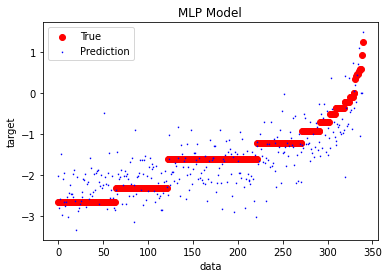

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

##Improving model

switch to logistic activation function since logistic regression performed well in classification exercise

In [ ]:
reg = MLPRegressor(random_state=0, activation='logistic', max_iter=500).fit(X_train_scaled, Y_train) #default activation is relu
y_pred=reg.predict(X_dev_scaled)

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.10963175247562673
R squared dev set 0.08422269362877144
MSE training set 0.5717834264434728
MSE dev set 0.480088554385341
RMSE training set 0.7561636241207803
RMSE dev set 0.6928842287029926


**Previously:**

R squared training set 0.9462768332441179

R squared dev set 0.44995795506733594

MSE training set 0.03758279317098042

MSE dev set 0.40839131800758693

RMSE training set 0.19386282049681527

RMSE dev set 0.6390550195465073

definitely improved

In [ ]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
227,-2.659260,-2.267843
1698,-2.659260,-2.286257
1608,-2.659260,-2.185508
639,-2.659260,-2.193175
108,-2.659260,-2.122138
...,...,...
1151,-0.223144,-2.031779
938,0.095310,-2.160593
2107,0.336472,-2.142012
1901,0.405465,-2.095357


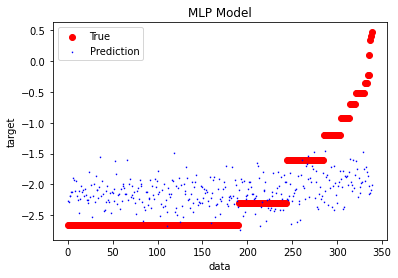

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

##DO NOT RUN, THIS CELL WILL TAKE 5 MINUTES OR MORE, trying out 50 different alphas

[How to Tune Algorithm Parameters with Scikit-Learn](https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = MLPRegressor(random_state=0, activation='logistic', max_iter=500)
#alphas = np.array(np.linspace(0,1))
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=np.linspace(0,1)))
grid.fit(X_train_scaled, Y_train)
#print(grid)
# summarize the results of the grid search
#print(grid.best_score_)
print(grid.best_estimator_.alpha)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

1.0


In [ ]:
grid.best_estimator_.alpha

1.0

In [ ]:
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

## CONTINUE

In [ ]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.4081632653061224, max_iter=500).fit(X_train_scaled, Y_train) #default alpha is 0.0001
#y_pred=reg.predict(X_dev_scaled)

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.09141575977842886
R squared dev set 0.08760670196156384
MSE training set 0.5834815106344052
MSE dev set 0.47831451646453266
RMSE training set 0.7638596144805702
RMSE dev set 0.6916028603646263


**Previously:**

R squared training set 0.820291452800259

R squared dev set 0.6952996630326977

MSE training set 0.12571762925210958

MSE dev set 0.2262317460234626

RMSE training set 0.3545668191640464

RMSE dev set 0.4756382512198347

barely improved

In [ ]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
227,-2.659260,-2.233614
1698,-2.659260,-2.276255
1608,-2.659260,-2.172192
639,-2.659260,-2.219871
108,-2.659260,-2.102121
...,...,...
1151,-0.223144,-2.089807
938,0.095310,-2.124625
2107,0.336472,-2.123949
1901,0.405465,-2.097352


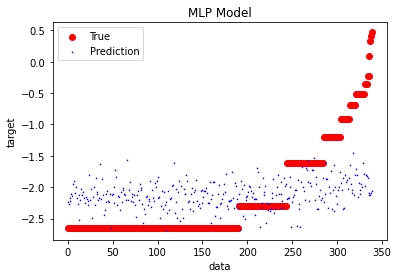

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

let's try changing the learning rate

In [ ]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.4081632653061224, learning_rate='adaptive', max_iter=500).fit(X_train_scaled, Y_train) #default learning rate is constant
#y_pred=reg.predict(X_dev_scaled)

In [ ]:
#if had time to run
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, learning_rate='adaptive', max_iter=500).fit(X_train_scaled, Y_train) #default learning rate is constant
y_pred=reg.predict(X_dev_scaled)

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.09141575977842886
R squared dev set 0.08760670196156384
MSE training set 0.5834815106344052
MSE dev set 0.47831451646453266
RMSE training set 0.7638596144805702
RMSE dev set 0.6916028603646263


**previously:**

R squared training set 0.7087118852087473

R squared dev set 0.7223231564094956

MSE training set 0.2037746773400293

MSE dev set 0.20616753424366885

RMSE training set 0.45141408633319063

RMSE dev set 0.4540567522278122

no change

we are working with a large dataset, but maybe not too large to try out LBFGS for the solver.

In [ ]:
len(X_train_scaled)

1359

In [ ]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.4081632653061224, solver='lbfgs', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
#y_pred=reg.predict(X_dev_scaled)

In [ ]:
#if had time to run
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, solver='lbfgs', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
y_pred=reg.predict(X_dev_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.7102631153419333
R squared dev set -0.7279742043762727
MSE training set 0.1860654275772695
MSE dev set 0.9058759504331694
RMSE training set 0.4313530196686578
RMSE dev set 0.9517751574994849


**previously:**

R squared training set 0.7087118852087473

R squared dev set 0.7223231564094956

MSE training set 0.2037746773400293

MSE dev set 0.20616753424366885

RMSE training set 0.45141408633319063

RMSE dev set 0.4540567522278122

horrible idea okay

In [ ]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.4081632653061224, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
#y_pred=reg.predict(X_dev_scaled)

In [ ]:
#if had time to run
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
y_pred=reg.predict(X_dev_scaled)

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.08085721478746966
R squared dev set 0.07536764495983106
MSE training set 0.590262077046083
MSE dev set 0.4847307392100871
RMSE training set 0.7682851534723829
RMSE dev set 0.6962260690394227


**previously:**

R squared training set 0.7087118852087473

R squared dev set 0.7223231564094956

MSE training set 0.2037746773400293

MSE dev set 0.20616753424366885

RMSE training set 0.45141408633319063

RMSE dev set 0.4540567522278122

worse. I think I know which performed best thus far

##best performing:

###if did not have time

In [ ]:
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.4081632653061224, max_iter=500).fit(X_train_scaled, Y_train)
#dev_pred=reg.predict(X_dev_scaled)
#y_pred=reg.predict(X_test_scaled)

###if had time to run long cell:

In [ ]:
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, max_iter=500).fit(X_train_scaled, Y_train)
dev_pred=reg.predict(X_dev_scaled)
y_pred=reg.predict(X_test_scaled)

### continue

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,dev_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, dev_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, dev_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.09141575977842886
R squared dev set 0.08760670196156384
MSE training set 0.5834815106344052
MSE dev set 0.47831451646453266
RMSE training set 0.7638596144805702
RMSE dev set 0.6916028603646263


In [ ]:
print(list(X_dev.index)==list(Y_dev.index))
dev_pred_series=pd.Series(dev_pred,index=X_dev.index)
print(list(dev_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=dev_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
227,-2.659260,-2.233614
1698,-2.659260,-2.276255
1608,-2.659260,-2.172192
639,-2.659260,-2.219871
108,-2.659260,-2.102121
...,...,...
1151,-0.223144,-2.089807
938,0.095310,-2.124625
2107,0.336472,-2.123949
1901,0.405465,-2.097352


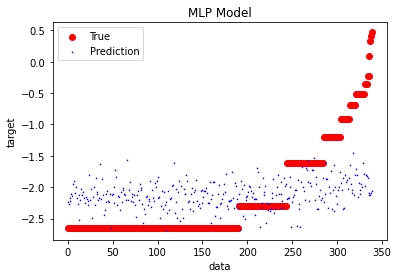

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared testing set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.09141575977842886
R squared testing set 0.01728516670700131
MSE training set 0.5834815106344052
MSE test set 0.5569996612355302
RMSE training set 0.7638596144805702
RMSE test set 0.7463240993265126


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1413,-2.659260,-2.321893
530,-2.659260,-2.308780
1010,-2.659260,-1.767932
1261,-2.659260,-2.129029
1646,-2.659260,-1.943804
...,...,...
1236,0.182322,-2.290800
1672,0.262364,-1.942095
753,0.262364,-2.092445
641,0.470004,-2.068041


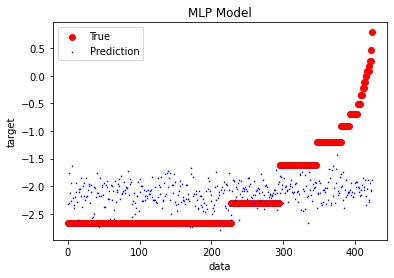

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

# All plots

In [ ]:
test_DF= pd.DataFrame(columns = ['Actual', 'Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
test_DF['Actual']=Y_test
#lasso
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred_lasso=reg.predict(X_test_scaled)
y_pred_series_lasso=pd.Series(y_pred_lasso,index=X_test.index)
test_DF['Lasso']=y_pred_series_lasso

#Decision Tree
reg = DecisionTreeRegressor(random_state = 0,max_depth=6) 
reg.fit(X_train, Y_train)
y_pred_tree = reg.predict(X_test)
y_pred_series_tree=pd.Series(y_pred_tree,index=X_test.index)
test_DF['Decision Tree']=y_pred_series_tree

#Random Forest 
#y_pred_forest
#y_pred_series_forest
test_DF['Random Forest']=y_pred_series_forest

#OLS
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred_OLS=reg.predict(X_test[used_OLS])
y_pred_series_OLS=pd.Series(y_pred_OLS,index=X_test.index)
test_DF['OLS']=y_pred_series_OLS

#Neural Network
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, max_iter=500).fit(X_train_scaled, Y_train)
y_pred_NN=reg.predict(X_test_scaled)
y_pred_series_NN=pd.Series(y_pred_NN,index=X_test.index)
test_DF['Neural Network']=y_pred_series_NN


In [ ]:
test_DF

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
622,0.000000,-2.264585,-2.233517,-2.481882,-2.196277,-2.336080
1062,-2.302585,-2.023013,-2.008142,-2.387213,-1.960148,-2.047635
1419,-2.659260,-2.295320,-2.233517,-2.011766,-2.240776,-2.331703
1544,-2.302585,-2.057105,-2.008142,-2.483496,-1.954213,-2.051655
229,-2.659260,-1.987828,-2.112439,-1.895570,-1.954914,-1.985550
...,...,...,...,...,...,...
1221,-1.203973,-2.068401,-1.712540,-2.430185,-2.052457,-2.039595
787,-1.203973,-2.134185,-1.908905,-2.357250,-2.252354,-2.075321
2018,0.095310,-2.170320,-2.008142,-1.240188,-2.052899,-2.251930
843,-2.659260,-1.974456,-1.712540,-2.193709,-1.963767,-1.950122


In [ ]:
test_DF.to_csv('test_combo_run1.csv')

In [ ]:
plot_df=test_DF.copy()
plot_df=plot_df.sort_values(by=["Actual"])

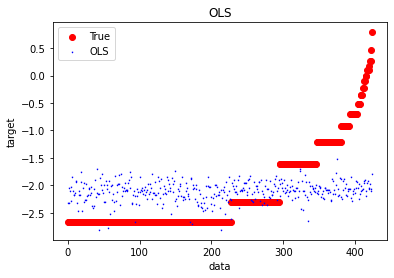

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['OLS'], color="blue", label="OLS",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS")
plt.legend()
plt.show()

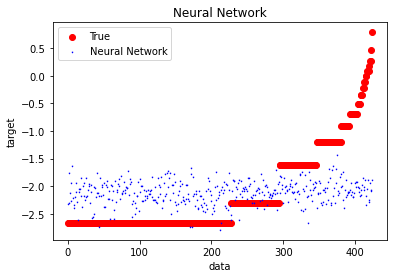

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Neural Network'], color="blue", label="Neural Network",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Neural Network")
plt.legend()
plt.show()

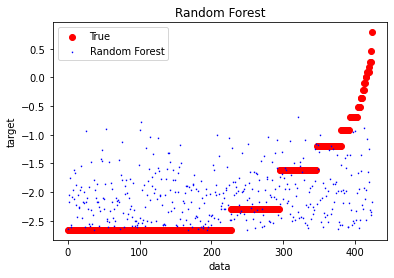

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Random Forest'], color="blue", label="Random Forest",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest")
plt.legend()
plt.show()

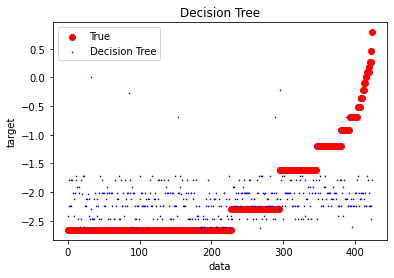

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Decision Tree'], color="blue", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree")
plt.legend()
plt.show()

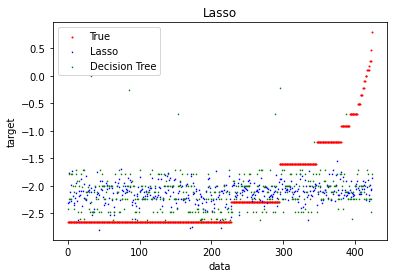

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True", s=1)
plt.scatter(range(len(plot_df)), plot_df['Lasso'], color="blue", label="Lasso",marker="v",s=0.5)
plt.scatter(range(len(plot_df)), plot_df['Decision Tree'], color="g", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso")
plt.legend()
plt.show()

doing a difference instead of got it or not since it is never actually exact

In [ ]:
diff_df=pd.DataFrame(columns = ['Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
for i in diff_df.columns:
  diff_df[i]= abs((test_DF['Actual']-test_DF[i]))
display(diff_df)

,Lasso,Decision Tree,Random Forest,OLS,Neural Network
622,2.264585,2.233517,2.481882,2.196277,2.336080
1062,0.279573,0.294444,0.084627,0.342437,0.254950
1419,0.363940,0.425743,0.647494,0.418484,0.327557
1544,0.245480,0.294444,0.180911,0.348372,0.250930
229,0.671432,0.546821,0.763690,0.704346,0.673710
...,...,...,...,...,...
1221,0.864428,0.508568,1.226212,0.848484,0.835623
787,0.930213,0.704932,1.153278,1.048381,0.871348
2018,2.265630,2.103452,1.335498,2.148209,2.347240
843,0.684804,0.946720,0.465551,0.695493,0.709138


In [ ]:
diff_dict={}
for i in diff_df.columns:
  x= np.mean(diff_df[i])
  diff_dict[i]=x
  print(" average difference from actual = {:.3f} ".format(x) + i)


 average difference from actual = 0.605 Lasso
 average difference from actual = 0.606 Decision Tree
 average difference from actual = 0.645 Random Forest
 average difference from actual = 0.611 OLS
 average difference from actual = 0.602 Neural Network


In [ ]:
performance=list(np.asarray(sorted(diff_dict.items(), key=lambda x: x[1]))[:,0])
print(performance)

['Neural Network', 'Lasso', 'Decision Tree', 'OLS', 'Random Forest']


now lets look at rounding all the predictions to the fixed values for detection levels

In [ ]:
levels=Y_train.value_counts().index.tolist()
levels

[-2.659260036932778,
 -1.6094379124341003,
 -2.3025850929940455,
 -1.2039728043259361,
 -0.916290731874155,
 -0.6931471805599453,
 -0.5108256237659907,
 -0.35667494393873245,
 -0.10536051565782628,
 0.0,
 -0.2231435513142097,
 0.26236426446749106,
 0.5306282510621704,
 0.1823215567939546,
 0.5877866649021191,
 0.09531017980432493,
 0.47000362924573563,
 0.4054651081081644,
 0.3364722366212129,
 0.6931471805599453,
 0.8329091229351039,
 1.840549633397487,
 1.1314021114911006,
 1.0986122886681098,
 1.0647107369924282]

In [ ]:
group_df=test_DF.copy()
for i in group_df.drop(columns="Actual").columns:
  for j,k in zip(group_df[i],group_df[i].index):
    dict1={}
    for a in levels:
      dict1[a]=abs(a-j)
    b=min(dict1, key=dict1.get)
    group_df[i][k]=b

In [ ]:
group_df

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
622,0.000000,-2.302585,-2.302585,-2.659260,-2.302585,-2.302585
1062,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
1419,-2.659260,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
1544,-2.302585,-2.302585,-2.302585,-2.659260,-1.609438,-2.302585
229,-2.659260,-2.302585,-2.302585,-1.609438,-1.609438,-2.302585
...,...,...,...,...,...,...
1221,-1.203973,-2.302585,-1.609438,-2.302585,-2.302585,-2.302585
787,-1.203973,-2.302585,-1.609438,-2.302585,-2.302585,-2.302585
2018,0.095310,-2.302585,-2.302585,-1.203973,-2.302585,-2.302585
843,-2.659260,-2.302585,-1.609438,-2.302585,-2.302585,-1.609438


In [ ]:
match_df=group_df.copy()
for i in match_df.columns:
  match_df[i]= (match_df['Actual'] == match_df[i])
display(match_df)

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
622,True,False,False,False,False,False
1062,True,False,False,False,False,False
1419,True,False,False,False,False,False
1544,True,False,False,False,False,False
229,True,False,False,False,False,False
...,...,...,...,...,...,...
1221,True,False,False,False,False,False
787,True,False,False,False,False,False
2018,True,False,False,False,False,False
843,True,False,False,False,False,False


:(( okay let's do difference again

In [ ]:
diff_group_df=pd.DataFrame(columns = ['Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
for i in diff_group_df.columns:
  diff_group_df[i]= abs((group_df['Actual']-group_df[i]))
display(diff_group_df)

,Lasso,Decision Tree,Random Forest,OLS,Neural Network
622,2.302585,2.302585,2.659260,2.302585,2.302585
1062,0.000000,0.000000,0.000000,0.000000,0.000000
1419,0.356675,0.356675,0.356675,0.356675,0.356675
1544,0.000000,0.000000,0.356675,0.693147,0.000000
229,0.356675,0.356675,1.049822,1.049822,0.356675
...,...,...,...,...,...
1221,1.098612,0.405465,1.098612,1.098612,1.098612
787,1.098612,0.405465,1.098612,1.098612,1.098612
2018,2.397895,2.397895,1.299283,2.397895,2.397895
843,0.356675,1.049822,0.356675,0.356675,1.049822


In [ ]:
diff_dict_levels={}
for i in diff_group_df.columns:
  x= np.mean(diff_group_df[i])
  diff_dict_levels[i]=x
  print(" average difference from actual = {:.3f} ".format(x) + i)

 average difference from actual = 0.583 Lasso
 average difference from actual = 0.586 Decision Tree
 average difference from actual = 0.630 Random Forest
 average difference from actual = 0.592 OLS
 average difference from actual = 0.572 Neural Network


In [ ]:
performance_levels=list(np.asarray(sorted(diff_dict_levels.items(), key=lambda x: x[1]))[:,0])
print(performance_levels)

['Neural Network', 'Lasso', 'Decision Tree', 'OLS', 'Random Forest']


In [ ]:
plotting_df=group_df.copy()
plotting_df=plotting_df.sort_values(by=["Actual"])

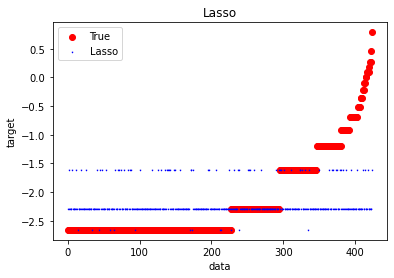

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Lasso'], color="blue", label="Lasso",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso")
plt.legend()
plt.show()

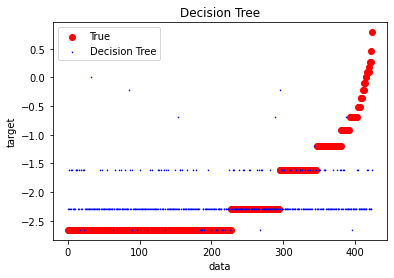

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Decision Tree'], color="blue", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree")
plt.legend()
plt.show()

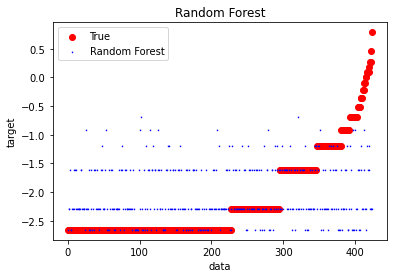

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Random Forest'], color="blue", label="Random Forest",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest")
plt.legend()
plt.show()

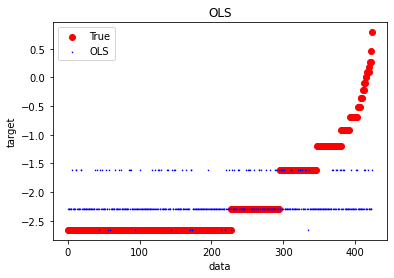

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['OLS'], color="blue", label="OLS",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS")
plt.legend()
plt.show()

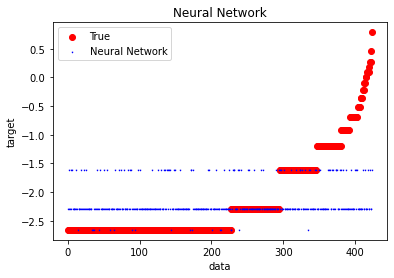

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Neural Network'], color="blue", label="Neural Network",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Neural Network")
plt.legend()
plt.show()

#**make a table or plot: take the 125 that are -1.609438 take the means and stdvs for those predictions. for each one of the numbers. summarize in table: if this is the actual value... here is my prediction mean and std (if plot could do an error bar, but table preferred)**

In [ ]:
explore_Df=test_DF.copy()
display(explore_Df)

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
1548,-2.302585,-2.195597,-2.349190,-2.141254,-2.152673,-2.239387
1063,-1.203973,-1.941564,-2.106227,-1.651820,-1.844401,-1.896656
1297,-2.659260,-2.843151,-2.552374,-2.372393,-2.984274,-2.837660
1315,-1.609438,-1.250043,-1.599027,-1.361994,-1.225010,-1.219660
790,-2.659260,-2.655278,-2.552374,-2.575553,-2.558011,-2.687932
...,...,...,...,...,...,...
1705,-2.302585,-2.629795,-2.552374,-2.575553,-2.501948,-2.624301
407,-2.659260,-2.182662,-2.349190,-2.141254,-2.122016,-2.286844
950,-2.302585,-1.466930,-1.758049,-1.408133,-1.500121,-1.403397
181,-1.203973,-1.622378,-1.256048,-1.620991,-1.749491,-1.599683


In [ ]:
# explore_Df=explore_Df.drop(explore_Df.index[explore_Df['Actual'] != -1.6094379124341003])
#not working, just find an index where it is that to compare

In [ ]:
sr=Y_train.value_counts()
sr_dex=sr.index
sr

-1.609438    369
-2.659260    283
-2.302585    272
-1.203973    166
-0.916291     82
-0.693147     51
-0.510826     30
-0.223144     23
-0.356675     18
-0.105361     12
 0.000000      7
 0.095310      6
 0.336472      4
 0.470004      4
 0.530628      4
 0.262364      4
 0.182322      4
 0.405465      3
 0.916291      2
 1.280934      2
 0.587787      2
 1.547563      1
 0.832909      1
 2.694627      1
 0.741937      1
 1.252763      1
 1.504077      1
 3.937691      1
 0.955511      1
 1.193922      1
 1.098612      1
 1.589235      1
Name: LBXPFDE, dtype: int64

i care about the first 8

**will have to rewrite numbers on left side each time**

In [ ]:
df369 = pd.DataFrame([[sr_dex[0], sr.values[0], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df283 = pd.DataFrame([[sr_dex[1], sr.values[1], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df272 = pd.DataFrame([[sr_dex[2], sr.values[2], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df166 = pd.DataFrame([[sr_dex[3], sr.values[3], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df82 = pd.DataFrame([[sr_dex[4], sr.values[4], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df51 = pd.DataFrame([[sr_dex[5], sr.values[5], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df30 = pd.DataFrame([[sr_dex[6], sr.values[6], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df23 = pd.DataFrame([[sr_dex[7], sr.values[7], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])

**will have to rewrite numbers on left side each time**

In [ ]:
Df369 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[0]].tolist()[0]]]
Df283 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[1]].tolist()[0]]]
Df272 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[2]].tolist()[0]]]
Df166 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[3]].tolist()[0]]]
Df82 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[4]].tolist()[0]]]
Df51 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[5]].tolist()[0]]]
Df30 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[6]].tolist()[0]]]
Df23 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[7]].tolist()[0]]]

**will have to rewrite numbers on left side each time**

In [ ]:
L1=['Lasso', 'Decision Tree', 'Random Forest', 'OLS', 'Neural Network']

L2=[Df369, Df283, Df272, Df166, Df82, Df51, Df30, Df23]
L3=[df369, df283, df272, df166, df82, df51, df30, df23]

for old,new in zip(L2,L3):
  for col in L1:
    new[col+' mean']=np.average(old[col])
    new[col+' std']=np.std(old[col])

In [ ]:
concatenated_dataframes = pd.concat(L3, axis=0)
display(concatenated_dataframes)

,detection level,no of samples in training,Lasso mean,Lasso std,Decision Tree mean,Decision Tree std,Random Forest mean,Random Forest std,OLS mean,OLS std,Neural Network mean,Neural Network std
0,-1.609438,369,-1.821090,0.298915,-1.737814,0.397601,-1.732223,0.356896,-1.769090,0.301856,-1.812103,0.315645
0,-2.659260,283,-2.336437,0.291443,-2.312194,0.325994,-2.313364,0.287119,-2.277199,0.292728,-2.339628,0.291485
0,-2.302585,272,-2.062951,0.337079,-2.053256,0.401958,-2.028794,0.382336,-2.011442,0.320878,-2.067169,0.355377
0,-1.203973,166,-1.414828,0.342504,-1.322155,0.377662,-1.318755,0.362695,-1.370033,0.348993,-1.394674,0.349322
0,-0.916291,82,-1.191654,0.452236,-1.064007,0.466201,-1.092096,0.445668,-1.146245,0.437572,-1.173044,0.448480
0,-0.693147,51,-0.910186,0.388700,-0.792619,0.380358,-0.778309,0.451536,-0.868024,0.391668,-0.901822,0.356097
0,-0.510826,30,-0.932766,0.371846,-0.839396,0.512430,-0.970255,0.627124,-0.882015,0.366158,-0.913050,0.373941
0,-0.223144,23,-0.584662,0.204488,-0.551442,0.253693,-0.319112,0.223408,-0.599399,0.283769,-0.497727,0.146484


In [ ]:
concatenated_dataframes.to_csv('levels_breakdown_combo_run10.csv')